# The green lungs of London and New York

### Libraries

First of all, let's import the libraries:

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# BeautifulSoup
from bs4 import BeautifulSoup

#!conda install -c conda-forge folium=0.5.0 --yes 
#import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0           conda-forge
    geopy:          

### Parks in London

Let's import from [Wikipedia page](https://en.wikipedia.org/wiki/Parks_and_open_spaces_in_London) a dataframe containing some of London green spaces.
To this pourpose, I use BeautifulSoup.

In [4]:
# Some of London parks

req = requests.get("https://en.wikipedia.org/wiki/Parks_and_open_spaces_in_London")

soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

london_parks = pd.DataFrame(df[0]) 

In [6]:
# First five elements of london_parks dataframe

london_parks.head()

,name,hectares,acres
0,Thames Chase,9842,"24,320[8]"
1,Epping Forest,2476,"6,118[9]"
2,Wildspace Conservation Park,645,"1,593[10]"
3,Wimbledon Common,460,"1,136[11]"
4,Hampstead Heath,320,790[12]


Now, I clean the "acres" column by removing numbers in brackets.

In [7]:
# I clean the "acres" column.

london_parks['acres'][0] = london_parks['acres'][0].replace('[8]', '')
london_parks['acres'][1] = london_parks['acres'][1].replace('[9]', '')
london_parks['acres'][2] = london_parks['acres'][2].replace('[10]', '')
london_parks['acres'][3] = london_parks['acres'][3].replace('[11]', '')
london_parks['acres'][4] = london_parks['acres'][4].replace('[12]', '')
london_parks['acres'][5] = london_parks['acres'][5].replace('[13]', '')
london_parks['acres'][6] = london_parks['acres'][6].replace('[14]', '')
london_parks['acres'][7] = london_parks['acres'][7].replace('[15]', '')
london_parks['acres'][8] = london_parks['acres'][8].replace('[16]', '')
london_parks['acres'][9] = london_parks['acres'][9].replace('[17]', '')
london_parks['acres'][13] = london_parks['acres'][13].replace('[18]', '')

london_parks['acres'][0] = london_parks['acres'][0].replace(',', '')
london_parks['acres'][1] = london_parks['acres'][1].replace(',', '')
london_parks['acres'][2] = london_parks['acres'][2].replace(',', '')
london_parks['acres'][3] = london_parks['acres'][2].replace(',', '')

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWar

In [8]:
# london_parks dataframe

london_parks.head()

,name,hectares,acres
0,Thames Chase,9842,24320
1,Epping Forest,2476,6118
2,Wildspace Conservation Park,645,1593
3,Wimbledon Common,460,1593
4,Hampstead Heath,320,790


Let's see the types of elements inside london_parks.

In [9]:
london_parks.dtypes

name        object
hectares     int64
acres       object
dtype: object

Since the "acres" column contains strings, I want to transform strings elements into numbers.

In [10]:
# I change the type of acres column from "object" to "int64"

london_parks["acres"] = pd.to_numeric(london_parks["acres"])
london_parks.dtypes

name        object
hectares     int64
acres        int64
dtype: object

The above dataframe is composed by three columns, i.e. "name", "hectares" and "acres". The "name" column contains all the parks. The "hectares" and "acres" columns contain the size territory of each park expressed resp. in hectares and acres.
Unfortunately, this dataframe is not complete. For this reason I need to fill manually the above dataframe with the remaining data from wikipedia.

In [11]:
# Add data from wikipedia

# Royal Parks
london_parks= london_parks.append({'name': 'Richmond Park','hectares': 955,'acres': 2359.85}, ignore_index=True)
london_parks = london_parks.append({'name': 'Bushy Park','hectares': 450,'acres': 1112}, ignore_index=True)
london_parks = london_parks.append({'name': 'Regent Park','hectares': 197,'acres': 486.79}, ignore_index=True)
london_parks = london_parks.append({'name': 'Hyde Park','hectares': 140,'acres': 346}, ignore_index=True)
london_parks = london_parks.append({'name': 'Kensington Gardens','hectares': 111,'acres': 274}, ignore_index=True)
london_parks = london_parks.append({'name': 'Greenwich Park','hectares': 73,'acres': 180}, ignore_index=True)
london_parks = london_parks.append({'name': 'St. James Park','hectares': 34,'acres': 84}, ignore_index=True)
london_parks = london_parks.append({'name': 'Green Park','hectares': 16,'acres': 39.5}, ignore_index=True)

# Council parks
london_parks = london_parks.append({'name': 'Victoria Park','hectares': 86.18,'acres': 213}, ignore_index=True)
london_parks = london_parks.append({'name': 'Battersea Park','hectares': 83,'acres': 205}, ignore_index=True)
london_parks = london_parks.append({'name': 'Crystal Palace Park','hectares': 80,'acres': 200}, ignore_index=True)
london_parks = london_parks.append({'name': 'Alexandra Park ','hectares': 80,'acres': 197.68}, ignore_index=True)
london_parks = london_parks.append({'name': 'Brockwell Park','hectares': 51,'acres': 126},ignore_index=True)

london_parks.head()

,name,hectares,acres
0,Thames Chase,9842.0,24320.0
1,Epping Forest,2476.0,6118.0
2,Wildspace Conservation Park,645.0,1593.0
3,Wimbledon Common,460.0,1593.0
4,Hampstead Heath,320.0,790.0



Let's simplify the name of Wildspace Conservation Park and Hainault Forest Country Park.

In [12]:
london_parks['name'][2]= 'Wildspace Park'
london_parks['name'][8]= 'Hainault Park'

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [13]:
# london_parks dataframe

london_parks.head()

,name,hectares,acres
0,Thames Chase,9842.0,24320.0
1,Epping Forest,2476.0,6118.0
2,Wildspace Park,645.0,1593.0
3,Wimbledon Common,460.0,1593.0
4,Hampstead Heath,320.0,790.0


The above dataframe contains **27** London's parks!

In [14]:
london_parks.shape

(27, 3)

### Forsquare to get the London's parks coordinates 

Since london_parks dataframe does not have location data, let's import it with Forsquare.

In [15]:
# Forsquare credentials

CLIENT_ID = 'NX1WPC5VTHDOD00ZA5NJIMN3UO4QRCYU24LRXUU1SN1XOCN3' # your Foursquare ID
CLIENT_SECRET = 'YF5WPODSRDE0FVO4QXRABZSZCWDZ4S03SZMGT3A2JEWOU0GN' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NX1WPC5VTHDOD00ZA5NJIMN3UO4QRCYU24LRXUU1SN1XOCN3
CLIENT_SECRET:YF5WPODSRDE0FVO4QXRABZSZCWDZ4S03SZMGT3A2JEWOU0GN


Let's create a new dataframe containing the coordinates of each park. Firstly, I define an empty dataframe.

In [16]:
# define the dataframe columns
column_names = ['name','latitude','longitude'] 

# instantiate the dataframe
london_parks_coordinates = pd.DataFrame(columns=column_names)

Let's fill london_parks_coordinates dataframe. I need to define a user_agent. We will name our agent foursquare_agent, as shown below.

In [17]:
# Fill the dataframe

for i in range(0,27):

 address= london_parks['name'][i]+', London'

 geolocator = Nominatim(user_agent="foursquare_agent")
 location = geolocator.geocode(address)
 latitude = location.latitude
 longitude = location.longitude

 london_parks_coordinates = london_parks_coordinates.append({'name': london_parks['name'][i] ,'latitude': latitude,'longitude': longitude}, ignore_index=True)

 

In [18]:
# First five rows of london_parks_coordinates

london_parks_coordinates.head()

,name,latitude,longitude
0,Thames Chase,51.609674,-0.115491
1,Epping Forest,51.655222,0.172040
2,Wildspace Park,51.631335,-0.106465
3,Wimbledon Common,51.427074,-0.244198
4,Hampstead Heath,51.563982,-0.167187



I merge now the two above dataframes: *london_parks* and *parks coordinates* in a single one. Let's call it *df_london_parks*.

In [19]:
df_london_parks = london_parks.merge(london_parks_coordinates)

In [20]:
# First five rows of df_london_parks

df_london_parks.head()

,name,hectares,acres,latitude,longitude
0,Thames Chase,9842.0,24320.0,51.609674,-0.115491
1,Epping Forest,2476.0,6118.0,51.655222,0.172040
2,Wildspace Park,645.0,1593.0,51.631335,-0.106465
3,Wimbledon Common,460.0,1593.0,51.427074,-0.244198
4,Hampstead Heath,320.0,790.0,51.563982,-0.167187


In [21]:
# Shape of df_london_parks

df_london_parks.shape

(27, 5)

### New York Parks

Let's import the New York Parks dataframe from [World Atlas](https://www.worldatlas.com/articles/the-largest-parks-in-new-york-city.html).

In [22]:
url="https://www.worldatlas.com/articles/the-largest-parks-in-new-york-city.html"

req = requests.get(url)

soup = BeautifulSoup(req.content,'lxml')

table = soup.find_all('table')[0]

df = pd.read_html(str(table))

newyork_parks = pd.DataFrame(df[0]) 

In [23]:
newyork_parks

,Rank,﻿Park Name,Borrough,"Area, Acres (Kilometers Squared)"
0,1,Pelham Bay Park,Bronx,"2,765 (11.19)"
1,2,Greenbelt,Staten Island,"1,778 (7.20)"
2,3,Van Cortlandt Park,Bronx,"1,146 (4.64)"
3,4,Flushing Meadows-Corona Park,Queens,897 (3.63)
4,5,Central Park,Manhattan,843 (3.41)
5,6,Freshkills Park,Staten Island,813 (3.29)
6,7,Marine Park,Brooklyn,798 (3.23)
7,8,Bronx Park,Bronx,718 (2.91)
8,9,Alley Pond Park,Queens,655 (2.65)
9,10,South Beach-Franklin Delano Roosevelt Boardwalk,Staten Island,638 (2.58)


I remove the "Rank" column and I rename the columns.

In [24]:
ny_parks=newyork_parks.rename(columns={'﻿Park Name': 'name', 'Borrough': 'borough','Area, Acres (Kilometers Squared)': 'acres'}).drop("Rank", axis=1)

The dataframe contains **10** New York's parks!

In [127]:
ny_parks.shape


(10, 3)

I clean the "acres" column by removing the territory extension values in brackets. Moreover, I add a row to the dataframe containing "Jamaica Bay Wildlife Refuge" datas.


In [25]:
# Clean the "acres" column

ny_parks['acres'][0]=ny_parks['acres'][0].replace(' (11.19)', '')
ny_parks['acres'][0]=ny_parks['acres'][0].replace(',', '')
ny_parks['acres'][1]=ny_parks['acres'][1].replace(' (7.20)', '')
ny_parks['acres'][1]=ny_parks['acres'][1].replace(',', '')
ny_parks['acres'][2]=ny_parks['acres'][2].replace(' (4.64)', '')
ny_parks['acres'][2]=ny_parks['acres'][2].replace(',', '')
ny_parks['acres'][3]=ny_parks['acres'][3].replace(' (3.63)', '')
ny_parks['acres'][4]=ny_parks['acres'][4].replace(' (3.41)', '')
ny_parks['acres'][5]=ny_parks['acres'][5].replace(' (3.29)', '')
ny_parks['acres'][6]=ny_parks['acres'][6].replace(' (3.23)', '')
ny_parks['acres'][7]=ny_parks['acres'][7].replace(' (2.91)', '')
ny_parks['acres'][8]=ny_parks['acres'][8].replace(' (2.65)', '')
ny_parks['acres'][9]=ny_parks['acres'][9].replace(' (2.58)', '')

ny_parks = ny_parks.append({'name': 'Jamaica Bay Wildlife Refuge','borough': 'Brooklyn, Queens','acres': 9155}, ignore_index=True)

ny_parks








,name,borough,acres
0,Pelham Bay Park,Bronx,2765
1,Greenbelt,Staten Island,1778
2,Van Cortlandt Park,Bronx,1146
3,Flushing Meadows-Corona Park,Queens,897
4,Central Park,Manhattan,843
5,Freshkills Park,Staten Island,813
6,Marine Park,Brooklyn,798
7,Bronx Park,Bronx,718
8,Alley Pond Park,Queens,655
9,South Beach-Franklin Delano Roosevelt Boardwalk,Staten Island,638


I change the "acres" column type from object to float. Also, I simplify the name of "South Beach-Franklin Delano Roosevelt Boardwalk".

In [26]:
# Transform the type of "acres" column

ny_parks['acres']= pd.to_numeric(ny_parks['acres'])

# Simplify the name of "South Beach-Franklin Delano Roosevelt Boardwalk"

ny_parks['name'][9]= 'Roosevelt Boardwalk'


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Forsquare to get New York's parks coordinates

As above, we want to find the coordinates of each park, recording them in a dataframe. Let's initialize it!

In [28]:
# define the dataframe columns
column_names = ['name','latitude','longitude'] 

# instantiate the dataframe
ny_parks_coordinates = pd.DataFrame(columns=column_names)

ny_parks_coordinates

,name,latitude,longitude


Let's fill ny_parks_coordinates with Forsquare.

In [29]:
# Fill the dataframe

for i in range(0,11):

 address= ny_parks['name'][i]+', New York'

 geolocator = Nominatim(user_agent="foursquare_agent")
 location = geolocator.geocode(address)
 latitude = location.latitude
 longitude = location.longitude
 
 
 ny_parks_coordinates = ny_parks_coordinates.append({'name': ny_parks['name'][i] ,'latitude': latitude,'longitude': longitude}, ignore_index=True)

 

In [30]:
# First five rows of ny_parks_coordinates

ny_parks_coordinates.head()

,name,latitude,longitude
0,Pelham Bay Park,40.854131,-73.822173
1,Greenbelt,40.747922,-73.155823
2,Van Cortlandt Park,40.897075,-73.886580
3,Flushing Meadows-Corona Park,40.740681,-73.843237
4,Central Park,40.782773,-73.965363


Finally, I add to ny_parks ny_parks_coordinates.

In [31]:
df_newyork_parks = ny_parks.merge(ny_parks_coordinates)

In [32]:
df_newyork_parks.head()

,name,borough,acres,latitude,longitude
0,Pelham Bay Park,Bronx,2765,40.854131,-73.822173
1,Greenbelt,Staten Island,1778,40.747922,-73.155823
2,Van Cortlandt Park,Bronx,1146,40.897075,-73.886580
3,Flushing Meadows-Corona Park,Queens,897,40.740681,-73.843237
4,Central Park,Manhattan,843,40.782773,-73.965363


# Methodology

### London's Park statistics

In [34]:
london_parks.describe()

,hectares,acres
count,27.000000,27.000000
mean,635.117778,1586.289630
std,1903.504552,4702.820998
min,16.000000,39.500000
25%,76.500000,188.840000
50%,111.000000,274.000000
75%,265.500000,655.000000
max,9842.000000,24320.000000


### The total extension of the most important green areas in London is:
### 42829.82 acres!

In [36]:
# total extension of London's parks expressed in acres

df_london_parks["acres"].sum()

42829.82

Recall that: 1 acre = 0,00404686 Km^2. 
### Hence, the total extension of London's parks expressed in Km^2 is: 
### 173.32628536520002 Km^2!

In [37]:
# Total extension of London's parks expressed in Km^2 is

42829.82*0.00404686

173.32628536520002

London has a territory extension equal to 1572 Km^2. Thanks to this data, one can calculate the percent of total green areas in London, as shown below.

### The percent of total green areas in London is approx. 11%!

In [38]:
# Percent of total green areas in London

173.32628536520002/1572*100

11.025845125012724

Recall that London has a population of 8,982,000. Therefore:
###  For every citzen in London there are approx. 20 m^2 of green available!

In [39]:
# Every citzen in London has about 20 m^2 of green. Simply divide the total London's territory extension by the total number of citzen.
# The following result is expressed in Km^2. 

173.32628536520002/8982000

1.9297070292273438e-05

### New York's parks statistics

In [40]:
ny_parks.describe()

,acres
count,11.000000
mean,1836.909091
std,2509.619272
min,638.000000
25%,758.000000
50%,843.000000
75%,1462.000000
max,9155.000000


### The total extension of the most important green areas in New York is:
### 20206 acres!

In [41]:
ny_parks['acres'].sum()

20206

### The total extension of  New York's parks expressed in Km^2 is:
###  118.81985646000001 Km^2!

In [42]:
# Recall that 1 acre = 0,00404686 Km^2. Hence, the total extension of New York's parks expressed in Km^2 is

29361*0.00404686

118.81985646000001

London has a territory extension equal to 1213.37 Km^2. Thanks to this data, one can calculate the percent of total green areas in New York, as shown below.

### The percent of total green areas in New York is approx. 10%!

In [43]:
# Percent of green areas in New York

118.81985646000001/1213.37*100

9.79254938394719

Recall that London has a population of 8,399,000. Therefore:

### For every citzen in New York there are approx. 14 m^2 of green available!

In [44]:
# Every citzen in London has about 14 m^2 of green. Simply divide the total New York's territory extension by the total number of citzen.
# The following result is expressed in Km^2. 

118.81985646000001/8399000

1.414690516251935e-05

### Green sparsity in London

In [3]:
# Import Folium

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

    altair:  4.1.0-py_1 conda-forge
    branca:  0.4.1-py_0 conda-forge
    folium:  0.5.0-py_0 conda-forge
    vincent: 0.4.4-py_1 conda-forge


folium-0.5.0         | 45 KB     | ##################################### | 1

I want to visualize London's parks on the city map. First of all I get the London's coordinates.

In [45]:
# London's coordinates

address= 'London'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
london_latitude = location.latitude
london_longitude = location.longitude

Let's create the London map.

In [46]:
# London map 
london_map = folium.Map(location=[london_latitude, london_longitude], zoom_start=10)



### Position of London's parks

In [47]:
# instantiate a feature group for the parks in the dataframe
parks = folium.map.FeatureGroup()

# loop through the acres and add each to the name feature group
for lat, lng, in zip(df_london_parks.latitude, df_london_parks.longitude):
    parks.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_london_parks.latitude)
longitudes = list(df_london_parks.longitude)
labels = list(df_london_parks.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(london_map)    
    
# add incidents to map
london_map.add_child(parks)

### London map with clusters

In [48]:
from folium import plugins

# let's start again with a clean copy of the map of London
london_map = folium.Map(location = [london_latitude, london_longitude], zoom_start = 10)

# instantiate a mark cluster object for the parks in the dataframe
parks = plugins.MarkerCluster().add_to(london_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_london_parks.latitude, df_london_parks.longitude, df_london_parks.name):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(parks)

# display map
london_map

### Green Sparsity in New York

In [49]:
# New York coordinates

address= 'New York'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
ny_latitude = location.latitude
ny_longitude = location.longitude

In [50]:
# create the New York map 

ny_map = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=10)

### Position of New York's parks

In [51]:
# instantiate a feature group for the parks in the dataframe
parks = folium.map.FeatureGroup()

# loop 
for lat, lng, in zip(df_newyork_parks.latitude, df_newyork_parks.longitude):
    parks.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_newyork_parks.latitude)
longitudes = list(df_newyork_parks.longitude)
labels = list(df_newyork_parks.name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(ny_map)    
    
# add incidents to map
ny_map.add_child(parks)

### New York map with clusters

In [52]:
from folium import plugins

# let's start again with a clean copy of the map of NY
ny_map = folium.Map(location = [ny_latitude, ny_longitude], zoom_start = 10)

# instantiate a mark cluster object for the incidents in the dataframe
parks = plugins.MarkerCluster().add_to(ny_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_newyork_parks.latitude, df_newyork_parks.longitude, df_newyork_parks.name):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(parks)

# display map
ny_map

## K-Clustering

In [53]:
# import k-means from clustering stage

from sklearn.cluster import KMeans

### London 

In [54]:
# set number of clusters
kclusters = 5

london_clustering = df_london_parks.drop('name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 2, 3, 3, 0, 0, 0, 0, 0, 0], dtype=int32)

In [55]:
# add clustering labels
df_london_parks.insert(0, 'Cluster Labels', kmeans.labels_)



In [56]:
df_london_parks.head()

,Cluster Labels,name,hectares,acres,latitude,longitude
0,1,Thames Chase,9842.0,24320.0,51.609674,-0.115491
1,2,Epping Forest,2476.0,6118.0,51.655222,0.172040
2,3,Wildspace Park,645.0,1593.0,51.631335,-0.106465
3,3,Wimbledon Common,460.0,1593.0,51.427074,-0.244198
4,0,Hampstead Heath,320.0,790.0,51.563982,-0.167187


In [58]:
# create map
map_london_parks_clusters = folium.Map(location=[london_latitude, london_longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_london_parks['latitude'], df_london_parks['longitude'], df_london_parks['name'], df_london_parks['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_london_parks_clusters)
       
map_london_parks_clusters

In [59]:
df_london_parks_grouped = df_london_parks.groupby('Cluster Labels')

In [60]:
df_0 = df_london_parks_grouped.mean()
df_0

,hectares,acres,latitude,longitude
Cluster Labels,,,,
0,110.484762,273.046190,51.502907,-0.109325
1,9842.000000,24320.000000,51.609674,-0.115491
2,2476.000000,6118.000000,51.655222,0.172040
3,518.333333,1432.666667,51.491781,-0.229257
4,955.000000,2359.850000,51.438512,-0.274735


In [62]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


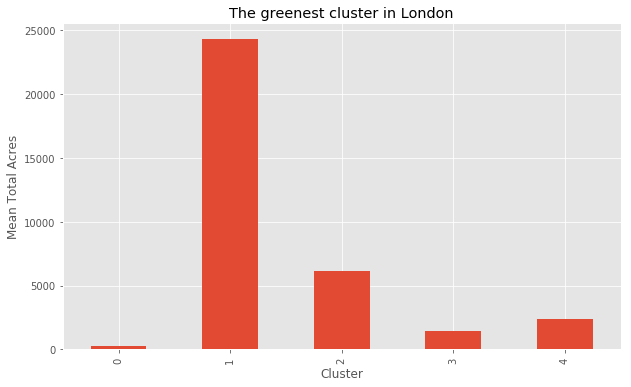

In [63]:
df_0['acres'].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cluster') # add to x-label to the plot
plt.ylabel('Mean Total Acres') # add y-label to the plot
plt.title('The greenest cluster in London') # add title to the plot

plt.show()

### New York

In [64]:
# set number of clusters
kclusters = 5

ny_clustering =df_newyork_parks.drop(['name', 'borough'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(ny_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 3, 4, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [65]:
# add clustering labels
df_newyork_parks.insert(0, 'Cluster Labels', kmeans.labels_)


In [66]:
# create map
map_ny_parks_clusters = folium.Map(location=[ny_latitude, ny_longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_newyork_parks['latitude'], df_newyork_parks['longitude'], df_newyork_parks['name'], df_newyork_parks['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_ny_parks_clusters)
       
map_ny_parks_clusters

In [67]:
df_newyork_parks_grouped = df_newyork_parks.groupby('Cluster Labels')

In [68]:
df=df_newyork_parks_grouped.mean()
df

,acres,latitude,longitude
Cluster Labels,,,
0,766,40.697959,-73.942370
1,9155,40.614120,-73.854268
2,2765,40.854131,-73.822173
3,1778,40.747922,-73.155823
4,1146,40.897075,-73.886580


In [69]:
df['acres']

Cluster Labels
0     766
1    9155
2    2765
3    1778
4    1146
Name: acres, dtype: int64

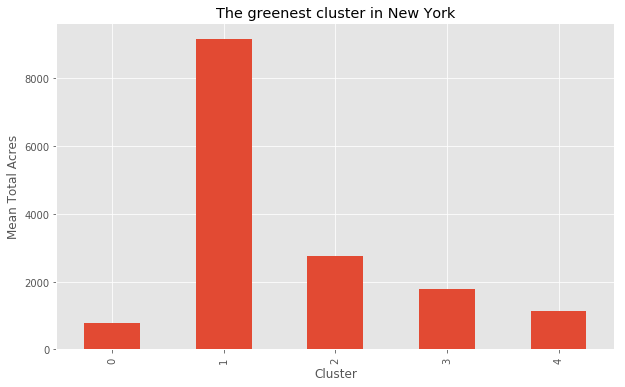

In [181]:
df['acres'].plot(kind='bar', figsize=(10, 6))

plt.xlabel('Cluster') # add to x-label to the plot
plt.ylabel('Mean Total Acres') # add y-label to the plot
plt.title('The greenest cluster in New York') # add title to the plot

plt.show()